In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/kaggle/input/house-pricing-dataset/house_prices.csv')  # Replace with your dataset path


In [8]:
# Drop rows with missing values
data.dropna(inplace=True)

# Remove outliers in 'price' column
data = data[data['price'] < data['price'].quantile(0.99)]


In [9]:
# Create a new feature 'total_rooms'
data['total_rooms'] = data['bedrooms'] + data['bathrooms']


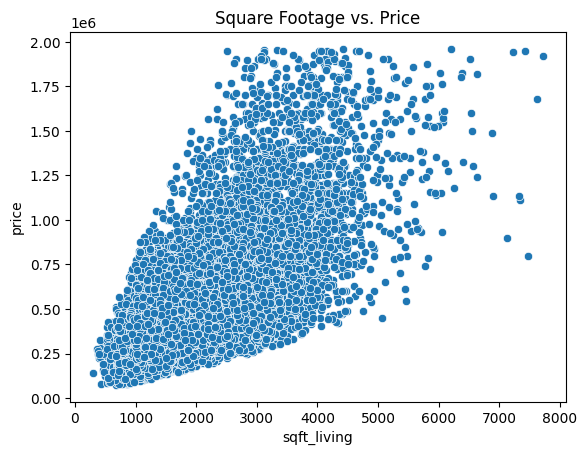

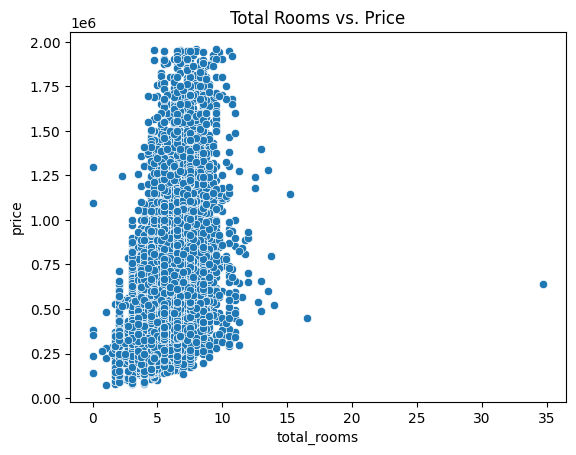

In [10]:
# Scatter plot: Square Footage vs. Price
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Square Footage vs. Price')
plt.show()

# Scatter plot: Total Rooms vs. Price
sns.scatterplot(x='total_rooms', y='price', data=data)
plt.title('Total Rooms vs. Price')
plt.show()


In [11]:
# Define features and target variable
X = data[['sqft_living', 'bedrooms', 'bathrooms']]
y = data['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:


# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 44072286616.319885
R-squared: 0.4458464459972056


In [13]:
# Retrieve model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)


       Feature   Coefficient
0  sqft_living    239.875307
1     bedrooms -37439.644412
2    bathrooms  13670.945048
